# Importing required Libraries

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_recall_curve,roc_curve,accuracy_score
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

# Importing the Dataset

In [5]:
Dataframe = pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_train.csv")
test_set=pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_test.csv")

In [6]:
Dataframe.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

# Renaming the Dataset as test and train

In [7]:
id_train = Dataframe.iloc[:,0:1]

In [8]:
X_train = Dataframe.iloc[:,1:24]

In [9]:
id_test = test_set.iloc[:,0:1]

In [10]:
X_test = test_set.iloc[:,1:]

In [11]:
Y_train = Dataframe.iloc[:,24:]

# Concatenating the Test and Train datasets for OneHotEncoding

In [12]:
Total_set=pd.concat([X_train,X_test],axis=0)

In [13]:
dummies_Gender=pd.get_dummies(Total_set['Gender'],prefix='Gender')
dummies_EDUCATION_STATUS= pd.get_dummies(Total_set['EDUCATION_STATUS'], prefix= 'EDUCATION_STATUS') 
dummies_MARITAL_STATUS= pd.get_dummies(Total_set['MARITAL_STATUS'], prefix= 'MARITAL_STATUS')
dummies_AGE= pd.get_dummies(Total_set['AGE'], prefix= 'AGE')

In [14]:
Total_set = pd.concat([Total_set, dummies_Gender, dummies_EDUCATION_STATUS, dummies_MARITAL_STATUS, dummies_AGE,], axis=1)
Total_set = Total_set.drop(['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'], axis=1)

In [15]:
Total_set.shape

(30000, 30)

In [16]:
Total_set.columns

Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_F', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65'],
      dtype='object')

# Resplitting the data as Test and Train

In [17]:
x_train=Total_set.iloc[:24000]
x_test=Total_set.iloc[24000:]

In [18]:
Train_columns = list(x_train.columns)

# Changing the variable Balance_Limit to a number

In [19]:
for i in range(24000):
    if x_train['Balance_Limit_V1'][i][-1]=='M':
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
for i in range(6000):
    if x_test['Balance_Limit_V1'][i][-1]=='M':
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000

In [21]:
x_train.columns

Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_F', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65'],
      dtype='object')

# Characteristic graphs between input variables and target variable

In [22]:
DF_for_graphs=pd.concat([x_train,Y_train],axis=1)

In [23]:
DF_for_graphs.columns

Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_F', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65',
       'NEXT_MONTH_DEFAULT'],
      dtype='object')

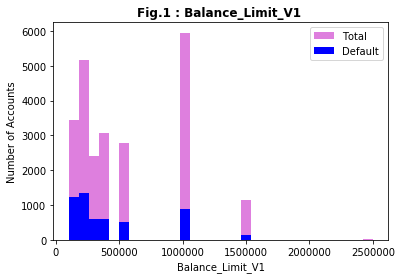

In [25]:
bins = 30
plt.hist(DF_for_graphs.Balance_Limit_V1, bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(DF_for_graphs.Balance_Limit_V1[DF_for_graphs['NEXT_MONTH_DEFAULT'] == 1], bins = bins, color='b',label = 'Default')

plt.xlabel('Balance_Limit_V1');plt.ylabel('Number of Accounts')
plt.title('Fig.1 : Balance_Limit_V1 ',fontweight="bold", size=12)
plt.legend();plt.show()

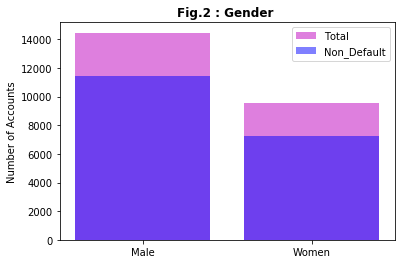

In [32]:
men = DF_for_graphs['Gender_M'][DF_for_graphs['Gender_M']==1].count()
men_default = DF_for_graphs['Gender_M'][(DF_for_graphs['Gender_M']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==0)].count()

women = DF_for_graphs['Gender_F'][DF_for_graphs['Gender_F']==1].count()
women_default = DF_for_graphs['Gender_F'][(DF_for_graphs['Gender_F']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==0)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex, color='m',alpha=0.5, label='Total')
plt.bar(gender,default_sex, color='b',alpha=0.5, label='Non_Default')

plt.xticks([1,2],['Male','Women']);plt.ylabel('Number of Accounts')
plt.title('Fig.2 : Gender ',fontweight="bold", size=12)
plt.legend();plt.show()

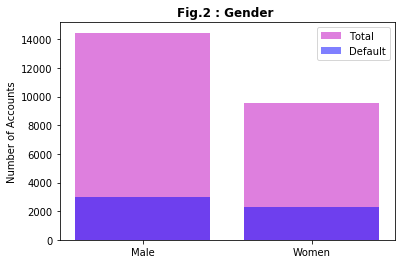

In [29]:
men = DF_for_graphs['Gender_M'][DF_for_graphs['Gender_M']==1].count()
men_default = DF_for_graphs['Gender_M'][(DF_for_graphs['Gender_M']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

women = DF_for_graphs['Gender_F'][DF_for_graphs['Gender_F']==1].count()
women_default = DF_for_graphs['Gender_F'][(DF_for_graphs['Gender_F']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex, color='m',alpha=0.5, label='Total')
plt.bar(gender,default_sex, color='b',alpha=0.5, label='Default')

plt.xticks([1,2],['Male','Women']);plt.ylabel('Number of Accounts')
plt.title('Fig.2 : Gender ',fontweight="bold", size=12)
plt.legend();plt.show()

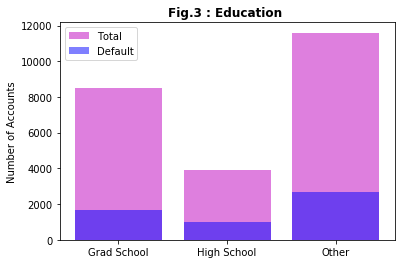

In [30]:
grad =  DF_for_graphs['EDUCATION_STATUS_Graduate'][DF_for_graphs['EDUCATION_STATUS_Graduate']==1].count()
grad_default = DF_for_graphs['EDUCATION_STATUS_Graduate'][(DF_for_graphs['EDUCATION_STATUS_Graduate']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

other =  DF_for_graphs['EDUCATION_STATUS_Other'][DF_for_graphs['EDUCATION_STATUS_Other']==1].count()
other_default = DF_for_graphs['EDUCATION_STATUS_Other'][(DF_for_graphs['EDUCATION_STATUS_Other']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

high =  DF_for_graphs['EDUCATION_STATUS_High School'][DF_for_graphs['EDUCATION_STATUS_High School']==1].count()
high_default = DF_for_graphs['EDUCATION_STATUS_High School'][(DF_for_graphs['EDUCATION_STATUS_High School']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

total_education = [grad, high, other]
default_education = [grad_default,high_default, other_default]
degree = [1,2,3]
plt.bar(degree,total_education, color='m',alpha=0.5, label='Total')
plt.bar(degree,default_education, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3],['Grad School','High School','Other'])
plt.ylabel('Number of Accounts');plt.title('Fig.3 : Education ',fontweight="bold", size=12)
plt.legend();plt.show()

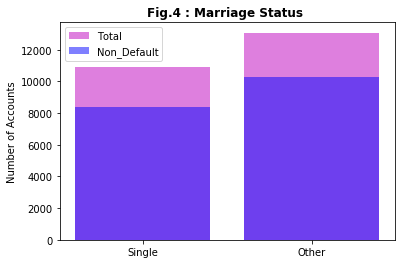

In [33]:
# Only 2 marital status regarding values are there(Other and Single)
single =  DF_for_graphs['MARITAL_STATUS_Single'][DF_for_graphs['MARITAL_STATUS_Single']==1].count()
single_default = DF_for_graphs['MARITAL_STATUS_Single'][(DF_for_graphs['MARITAL_STATUS_Single']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==0)].count()

other =  DF_for_graphs['MARITAL_STATUS_Other'][DF_for_graphs['MARITAL_STATUS_Other']==1].count()
other_default = DF_for_graphs['MARITAL_STATUS_Other'][(DF_for_graphs['MARITAL_STATUS_Other']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==0)].count()

total_marriage = [single, other]
default_marriage = [single_default,other_default]
status = [1,2]
plt.bar(status,total_marriage, color='m',alpha=0.5, label='Total')
plt.bar(status,default_marriage, color='b',alpha=0.5, label='Non_Default')

plt.xticks([1,2],['Single','Other']); plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Marriage Status ',fontweight="bold", size=12)
plt.legend(); plt.show()

In [36]:
features=DF_for_graphs.columns

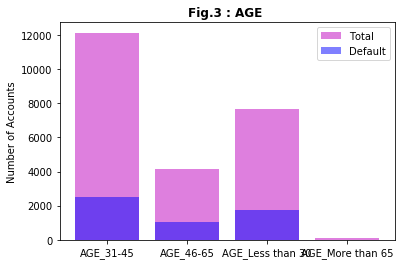

In [35]:
AGE_31_45 =  DF_for_graphs['AGE_31-45'][DF_for_graphs['AGE_31-45']==1].count()
AGE_31_45_default = DF_for_graphs['AGE_31-45'][(DF_for_graphs['AGE_31-45']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

AGE_46_65 =  DF_for_graphs['AGE_46-65'][DF_for_graphs['AGE_46-65']==1].count()
AGE_46_65_default = DF_for_graphs['AGE_46-65'][(DF_for_graphs['AGE_46-65']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

AGE_Less_than_30 =  DF_for_graphs['AGE_Less than 30'][DF_for_graphs['AGE_Less than 30']==1].count()
AGE_Less_than_30_default = DF_for_graphs['AGE_Less than 30'][(DF_for_graphs['AGE_Less than 30']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

AGE_More_than_65 =  DF_for_graphs['AGE_More than 65'][DF_for_graphs['AGE_More than 65']==1].count()
AGE_More_than_65_default = DF_for_graphs['AGE_More than 65'][(DF_for_graphs['AGE_More than 65']==1)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()

total_AGE = [AGE_31_45, AGE_46_65, AGE_Less_than_30,AGE_More_than_65]
default_AGE = [AGE_31_45_default,AGE_46_65_default,AGE_Less_than_30_default, AGE_More_than_65_default]
degree = [1,2,3,4]
plt.bar(degree,total_AGE, color='m',alpha=0.5, label='Total')
plt.bar(degree,default_AGE, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3,4],['AGE_31-45','AGE_46-65','AGE_Less than 30','AGE_More than 65'])
plt.ylabel('Number of Accounts');plt.title('Fig.3 : AGE ',fontweight="bold", size=12)
plt.legend();plt.show()

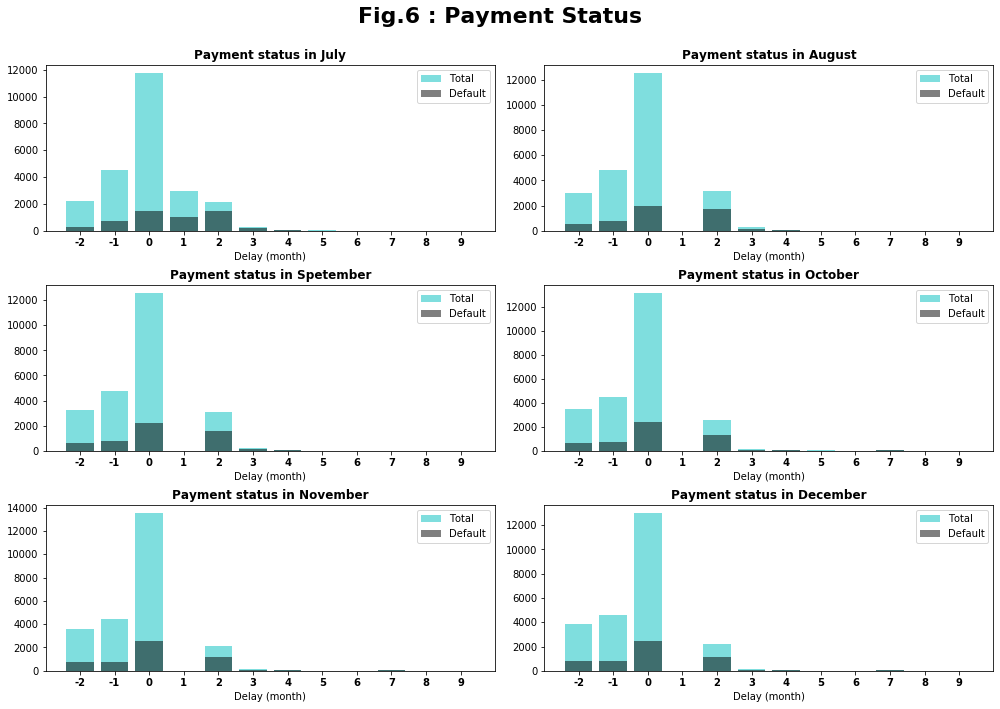

In [39]:
import matplotlib.gridspec as gridspec
features = list(DF_for_graphs.columns)
plt.figure(figsize=(14,10))

gs = gridspec.GridSpec(3,2)
i = 0

plt.suptitle('Fig.6 : Payment Status',fontweight="bold", fontsize=22)
for cn in features[1:7]:
    ax = plt.subplot(gs[i])
    delay = np.zeros(12)
    delay_default = np.zeros(12)  
    for j in np.arange(0,12):
            delay[j] = DF_for_graphs[cn][DF_for_graphs[cn]==j-2].count()
            delay_default[j] = DF_for_graphs[cn][(DF_for_graphs[cn]==j-2)&(DF_for_graphs['NEXT_MONTH_DEFAULT']==1)].count()  

    month = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(month,delay, color='c',alpha=0.5, label='Total')
    plt.bar(month,delay_default, color='k',alpha=0.5, label='Default')

    plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8,9],['-2','-1','0','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Delay (month)')
    months = ['July','August','Spetember','October','November','December']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()